## RandomizedSearchCV 이용한 DT, RF, GB Model 

In [1]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 글꼴 목록 가져오기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 글꼴의 이름과 파일 경로 출력
for font in font_list:
    font_prop = fm.FontProperties(fname=font)
    print(font_prop.get_name(), font)

Swis721 BlkEx BT C:\Windows\Fonts\swissek.ttf
Swis721 BlkCn BT C:\Windows\Fonts\swisscki.ttf
Bodoni MT C:\Windows\Fonts\BOD_PSTC.TTF
AMGDT_IV50 C:\Windows\Fonts\Amgdt_IV50.ttf
Blackadder ITC C:\Windows\Fonts\ITCBLKAD.TTF
Georgia C:\Windows\Fonts\georgiaz.ttf
OCR A Extended C:\Windows\Fonts\OCRAEXT.TTF
Swis721 Blk BT C:\Windows\Fonts\swisski.ttf
Calibri C:\Windows\Fonts\calibri.ttf
Corbel C:\Windows\Fonts\corbelli.ttf
Microsoft New Tai Lue C:\Windows\Fonts\ntailu.ttf
HYnamM C:\Windows\Fonts\HYNAMM.TTF
HYGungSo-Bold C:\Windows\Fonts\H2GSRB.TTF
RomanS C:\Windows\Fonts\romans_IV25.ttf
Segoe UI C:\Windows\Fonts\segoeuib.ttf
TtsNote C:\Windows\Fonts\TTSNOTE.TTF
Times New Roman C:\Windows\Fonts\timesi.ttf
Symap C:\Windows\Fonts\symap_IV50.ttf
Swis721 Cn BT C:\Windows\Fonts\swissci.ttf
Dutch801 Rm BT C:\Windows\Fonts\dutch.ttf
Verdana C:\Windows\Fonts\verdanaz.ttf
NanumSquareOTF C:\Users\space\AppData\Local\Microsoft\Windows\Fonts\NanumSquareR.otf
RomanS C:\Windows\Fonts\romans__.ttf
Lucida Fa

In [4]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import pandas as pd

# 배열 구성
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 맑은 고딕 적용
matplotlib.rc("font", family = "Calibri")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

#### 데이터 불러오기

In [5]:
# 데이터 불러오기
Car_raw = pd.read_csv("Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


#### 데이터 처리
각 차이가 적은 Model은 Drop  
대신 Brand 및 Location은 그대로 유지하여 Dummy

In [6]:
Car_raw.drop(columns=['Model', 'Name'], inplace=True)

In [7]:
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,False,False,...,False,False,False,False,False,False,False,False,False,False
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,True,False,...,False,False,False,False,False,False,False,False,False,False
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0,5,False,False,...,False,False,False,False,False,False,False,False,False,True
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0,6,False,False,...,False,False,False,False,False,False,False,False,False,True
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0,4,False,True,...,False,False,False,False,False,False,False,False,False,True
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0,5,False,False,...,False,False,False,False,False,False,False,False,False,True


#### 데이터셋 분리

In [8]:
# 데이터셋 분리
# train/test data 분리
# X와 Y를 나누기 (예: 목표 변수 컬럼이 "Y"인 경우)
X = Car_raw_dummy.drop("Price", axis=1) # 설명 변수
Y = Car_raw_dummy["Price"] # 목표 변수

# train_test_split을 통해 훈련/테스트 세트 나누기
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, Y, test_size=0.3, random_state=1234)

# 훈련 및 테스트 세트 인덱스 리셋
df_train_x = df_train_x.reset_index(drop=True)
df_test_x = df_test_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_test_y = df_test_y.reset_index(drop=True)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [13]:
# 변수명 저장
v_feature_name = df_train_x.columns

### 의사결정나무 RandomizedSearchCV

#### RandomizedSearchCV를 이용한 Parameter 최적화

In [16]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = DecisionTreeRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error"], 
              "max_features": [None, "sqrt", "log2"],
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)],
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)]}

# 설명력이 높은 최적 parameter 찾기
rand_dt = RandomizedSearchCV(estimator, 
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2", 
                             n_jobs=-1, 
                             random_state=1234)
rand_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_dt.best_estimator_))
print("\nbest parameter: \n{}".format(rand_dt.best_params_))
print("\nbest score: \n{}".format(rand_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=7, min_samples_split=23)

best parameter: 
{'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 11, 'criterion': 'absolute_error'}

best score: 
0.777


In [17]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_dt= DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=7, min_samples_split=23, random_state=1234)

rand_cv_dt.fit(df_train_x, df_train_y)
rand_cv_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 23,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1234,
 'splitter': 'best'}

In [18]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_dt.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_dt.score(df_test_x, df_test_y)))

Score on training set: 0.843
Score on test set: 0.830


In [19]:
# rand_cv_dt_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_dt.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.582
0,Year,0.206
3,Engine,0.077
2,Mileage,0.026
1,Kilometers_Driven,0.020
54,Brand_TOYOTA,0.012
46,Brand_MERCEDES-BENZ,0.011
29,Brand_AUDI,0.011
5,Seats,0.010
47,Brand_MINI,0.006


Text(0, 0.5, '변수')

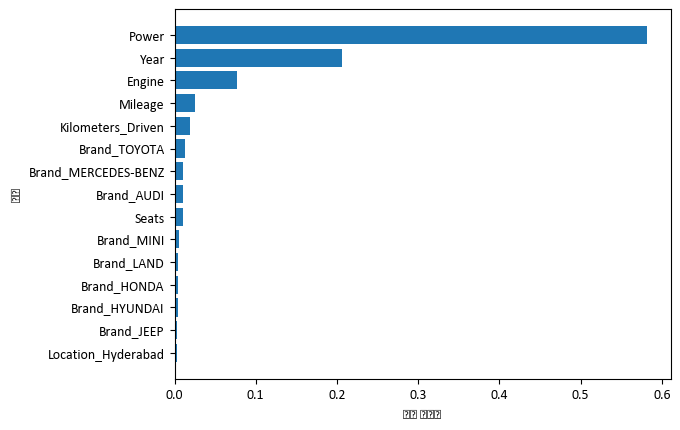

In [20]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

# 상위 5개 변수 선택
df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 랜덤포레스트 RandomizedSearchCV

#### RandomizedSearchCV를 이용한 Parameter 최적화

In [21]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = RandomForestRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error"], 
              "max_features": [None, "sqrt", "log2"],
              "n_estimators" : [estimators for estimators in range(50, 500)],
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)],
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)]}

# 설명력이 높은 최적 parameter 찾기
rand_rf = RandomizedSearchCV(estimator, 
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2", 
                             n_jobs=-1, 
                             random_state=1234)
rand_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_rf.best_estimator_))
print("\nbest parameter: \n{}".format(rand_rf.best_params_))
print("\nbest score: \n{}".format(rand_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2,
                      n_estimators=329)

best parameter: 
{'n_estimators': 329, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 13, 'criterion': 'squared_error'}

best score: 
0.824


In [22]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_rf = RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2,
                      n_estimators=329, random_state=1234)
rand_cv_rf.fit(df_train_x, df_train_y)

rand_cv_rf.fit(df_train_x, df_train_y)
rand_cv_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 13,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 329,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_rf.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_rf.score(df_test_x, df_test_y)))

Score on training set: 0.949
Score on test set: 0.880


In [24]:
# rand_cv_rf_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_rf.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.650
0,Year,0.161
1,Kilometers_Driven,0.047
2,Mileage,0.035
3,Engine,0.026
43,Brand_LAND,0.013
5,Seats,0.009
12,Location_Hyderabad,0.008
46,Brand_MERCEDES-BENZ,0.006
29,Brand_AUDI,0.006


Text(0, 0.5, '변수')

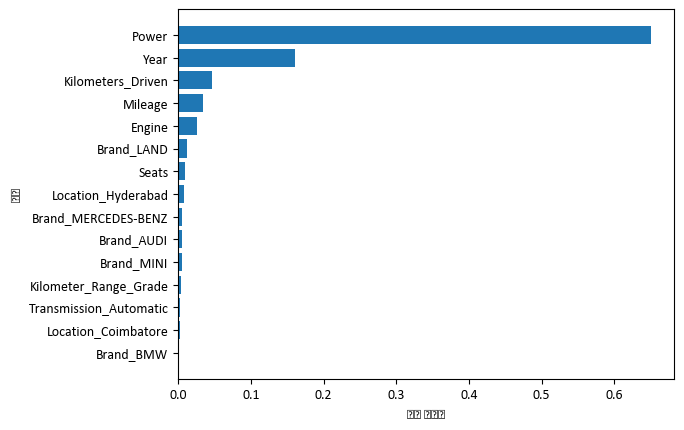

In [25]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

# 상위 5개 변수 선택
df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 그래디언트 부스팅 RandomizedSearchCV

#### RandomizedSearchCV를 이용한 Parameter 최적화

In [9]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = GradientBoostingRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["friedman_mse", "squared_error"], 
              "max_features": [None, "sqrt", "log2"], 
              "n_estimators" : [estimators for estimators in range(50, 500)], 
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)], 
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)],
              "learning_rate": [lr * 0.02 for lr in range(1, 20)]}

# 설명력이 높은 최적 parameter 찾기
rand_gb = RandomizedSearchCV(estimator,
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2",
                             n_jobs=-1,
                             random_state=1234)
rand_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_gb.best_estimator_))
print("\nbest parameter: \n{}".format(rand_gb.best_params_))
print("\nbest score: \n{}".format(rand_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435)

best parameter: 
{'n_estimators': 435, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 16, 'learning_rate': 0.06, 'criterion': 'squared_error'}

best score: 
0.841


In [10]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_gb= GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435, random_state=1234)

rand_cv_gb.fit(df_train_x, df_train_y)
rand_cv_gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.06,
 'loss': 'squared_error',
 'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 435,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [11]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_gb.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_gb.score(df_test_x, df_test_y)))

Score on training set: 0.973
Score on test set: 0.900


In [14]:
# rand_cv_gb_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_gb.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.243
3,Engine,0.165
23,Transmission_Manual,0.098
0,Year,0.088
2,Mileage,0.075
1,Kilometers_Driven,0.063
22,Transmission_Automatic,0.056
46,Brand_MERCEDES-BENZ,0.034
19,Fuel_Type_Diesel,0.031
6,Kilometer_Range_Grade,0.021


Text(0, 0.5, '변수')

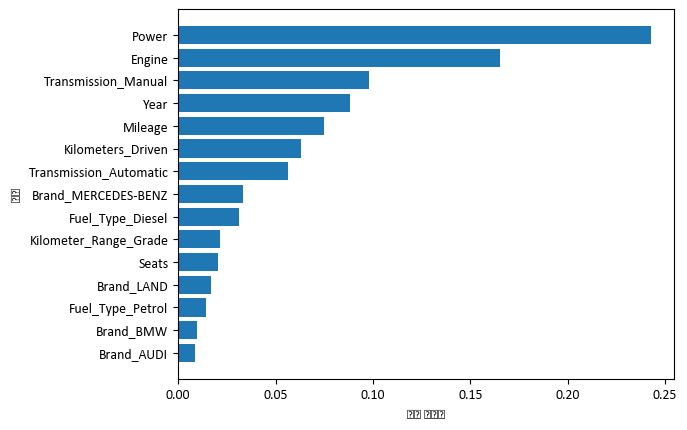

In [15]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

# 상위 5개 변수 선택
df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")